<a href="https://colab.research.google.com/github/JSJeong-me/Introduction-to-Data-Analysis-with-DL-and-ML/blob/main/4-Data-Analysis/35-CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical


In [2]:
# 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# 정규화: 이미지 데이터를 0과 1 사이로 스케일링
train_images, test_images = train_images / 255.0, test_images / 255.0

# 레이블을 원-핫 인코딩
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


170498071/170498071 [==============================] - 13s 0us/step


In [3]:
model = models.Sequential([
    # 첫 번째 컨볼루션 레이어
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    # 두 번째 컨볼루션 레이어
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # 세 번째 컨볼루션 레이어
    layers.Conv2D(64, (3, 3), activation='relu')
])

# Flatten 후 Dense 레이어 추가
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10개의 출력 클래스


In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 11s 4ms/step - loss: 1.5121 - accuracy: 0.4476 - val_loss: 1.3334 - val_accuracy: 0.5262
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1358 - accuracy: 0.5973 - val_loss: 1.0714 - val_accuracy: 0.6153
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9849 - accuracy: 0.6539 - val_loss: 1.0228 - val_accuracy: 0.6418
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8918 - accuracy: 0.6873 - val_loss: 0.9760 - val_accuracy: 0.6669
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8211 - accuracy: 0.7137 - val_loss: 0.8674 - val_accuracy: 0.6990
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7574 - accuracy: 0.7347 - val_loss: 0.8807 - val_accuracy: 0.6960
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7063 - accuracy: 0.7516 - val_loss: 0.8625 - val_accuracy

313/313 [==============================] - 1s 2ms/step


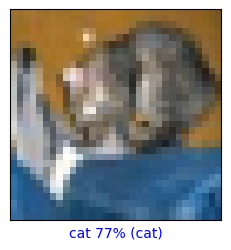

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 클래스 레이블 정의
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == np.argmax(true_label):
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[np.argmax(true_label)]),
                                         color=color)

# 예측 수행
predictions = model.predict(test_images)

# 첫 번째 테스트 이미지에 대한 예측 결과를 확인
num = 0  # 확인하고 싶은 테스트 이미지 번호
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(num, predictions[num], test_labels, test_images)
plt.show()
